# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [122]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [123]:
temperature = []
humidity = []
cloudiness = []
Wind_Speed = []
Lat = []
Lng = []
City_numb = []
country_codes = []


for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        City_numb.append(response['id'])
        country_codes.append(response['sys']['country'])
       

    except:
        temperature.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(0)
        Wind_Speed.append(np.nan)
        Lat.append(np.nan)
        Lng.append(np.nan)
        City_numb.append(np.nan)
        country_codes.append(np.nan)
        

#         print(f"Currently processing data for: {city} | {City_numb}")
        
# print("--------------------------------------------")
# print("Data Processing Complete")
# print("--------------------------------------------")
        

In [124]:
print(len(temperature))
print(len(humidity))
print(len(cloudiness))
print(len(Wind_Speed))
print(len(Lat))
print(len(Lng))
print(len(City_numb))
print(len(dates))
print(len(country_codes))

619
619
619
619
619
619
619
619
619


In [39]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 57.05,
        "lon": -135.33
    },
    "dt": 1597363617,
    "id": 5557293,
    "main": {
        "feels_like": 13.71,
        "humidity": 67,
        "pressure": 1018,
        "temp": 15,
        "temp_max": 15,
        "temp_min": 15
    },
    "name": "Sitka",
    "sys": {
        "country": "US",
        "id": 7795,
        "sunrise": 1597325149,
        "sunset": 1597380390,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 1.5
    }
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [125]:
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": Lat,
                           "Longitude": Lng,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": Wind_Speed,
                           "Country": country_codes
                          })
weather_df = weather_df.dropna(how='any')
weather_df

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Country
0,asau,46.43,26.40,88.0,55.99,0,0.45,RO
1,namerikawa,36.77,137.33,63.0,91.40,40,13.87,JP
2,port elizabeth,-33.92,25.57,87.0,44.60,0,5.82,ZA
3,nanortalik,60.14,-45.24,83.0,42.67,6,6.98,GL
4,tasiilaq,65.61,-37.64,69.0,38.19,65,7.49,GL
...,...,...,...,...,...,...,...,...
614,port perry,44.11,-78.94,72.0,66.20,1,4.70,CA
615,bosaso,11.28,49.18,41.0,90.09,100,12.03,SO
616,bubaque,11.28,-15.83,85.0,79.48,96,11.72,GW
617,hamilton,39.18,-84.53,88.0,75.20,75,8.05,US


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# No cities over 100 Humidity after check

In [126]:
reduced_weather_df = weather_df.loc[(weather_df["Humidity"] <= 100)]

In [127]:
#  Get the indices of cities that have humidity over 100%.
Indices = weather_df[weather_df['Humidity']>100].index.tolist()
print(Indices)

[]


In [128]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [129]:
# Export the City_Data into a csv
weather_df.to_csv("../output_data/weather_df.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

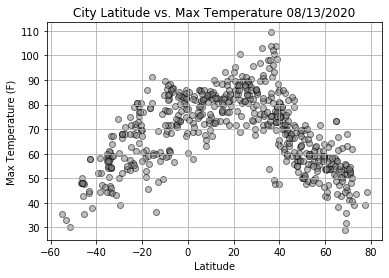

In [130]:
x_axis = weather_df['Latitude']
y_axis = weather_df['Max Temp']
plt.scatter(x_axis, y_axis, marker='o', facecolors='gray', alpha=.5, edgecolors='black')


plt.title("City Latitude vs. Max Temperature 08/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('../output_data/LatvsTemp.png')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

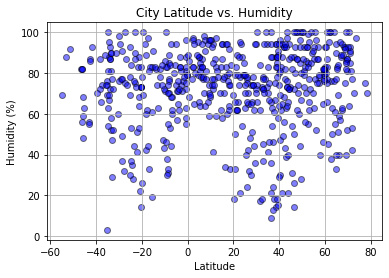

In [131]:
x_axis = weather_df['Latitude']
y_axis = weather_df['Humidity']
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', alpha=.5, edgecolors='black')


plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('../output_data/LatvsHumidity.png')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

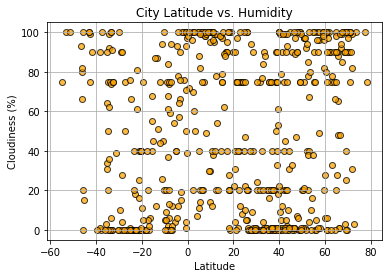

In [133]:
x_axis = weather_df['Latitude']
y_axis = weather_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker='o', facecolors='orange', alpha=.75, edgecolors='black')


plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('../output_data/LatvsCloudy.png')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

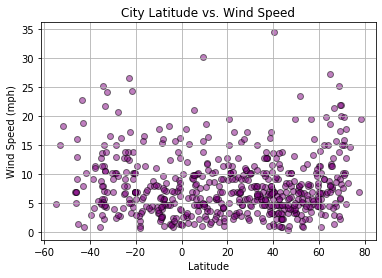

In [134]:
x_axis = weather_df['Latitude']
y_axis = weather_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker='o', facecolors='purple', alpha=.5, edgecolors='black')


plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('../output_data/LatvsWinds.png')
plt.grid()
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [135]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df = weather_df.loc[(weather_df['Latitude'] > 0)]
Southern_df = weather_df.loc[(weather_df['Latitude'] < 0)]

In [136]:
Southern_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Country
2,port elizabeth,-33.92,25.57,87.0,44.60,0,5.82,ZA
7,hermanus,-34.42,19.23,88.0,55.00,99,8.01,ZA
9,atuona,-9.80,-139.03,71.0,77.94,5,17.76,PF
10,maldonado,-34.67,-54.92,100.0,54.00,75,5.84,UY
15,ushuaia,-54.80,-68.30,69.0,35.60,75,4.83,AR


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

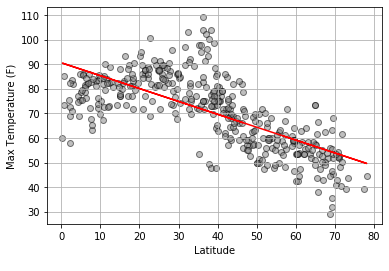

The r-squared is: -0.7064922953610264


In [137]:
x_value = Northern_df['Latitude']
y_value = Northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value, marker='o', facecolors='gray', alpha=.5, edgecolors='black')
plt.plot(x_value, regress_values, 'r-')
plt.annotate(line_eq,(-1,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('../output_data/NrthLatvsTemp.png')
plt.grid()
plt.show()
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

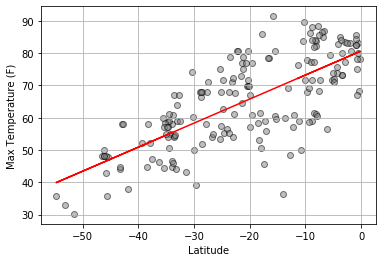

The r-squared is: 0.7348821991124455


In [138]:
x_value = Southern_df['Latitude']
y_value = Southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value, marker='o', facecolors='gray', alpha=.5, edgecolors='black')
plt.plot(x_value, regress_values, 'r-')
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('../output_data/SouthLatvsTemp.png')
plt.grid()
plt.show()
print(f'The r-squared is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

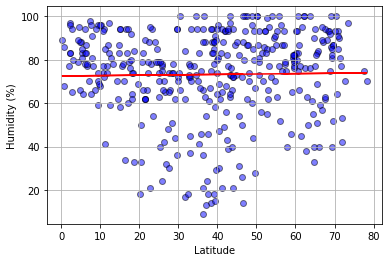

The r-squared is: 0.017682342742955236


In [139]:
x_value = Northern_df['Latitude']
y_value = Northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value, marker='o', facecolors='blue', alpha=.5, edgecolors='black')
plt.plot(x_value, regress_values, 'r-')
plt.annotate(line_eq,(3,3),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('../output_data/NorthLatvsHumidity.png')
plt.grid()
plt.show()
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

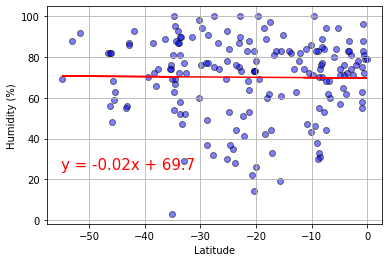

The r-squared is: -0.012224064925886633


In [140]:
x_value = Southern_df['Latitude']
y_value = Southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value, marker='o', facecolors='blue', alpha=.5, edgecolors='black')
plt.plot(x_value, regress_values, 'r-')
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('../output_data/SouthLatvsHumidity.png')
plt.grid()
plt.show()
print(f'The r-squared is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

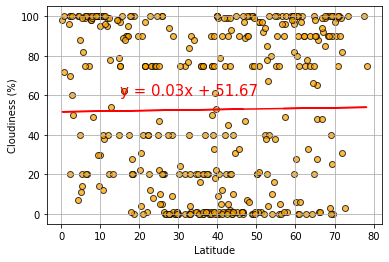

The r-squared is: 0.014365489371989663


In [141]:
x_value = Northern_df['Latitude']
y_value = Northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value, marker='o', facecolors='orange', alpha=.75, edgecolors='black')
plt.plot(x_value, regress_values, 'r-')
plt.annotate(line_eq,(15,60),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('../output_data/NorthLatvsClouds.png')
plt.grid()
plt.show()
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

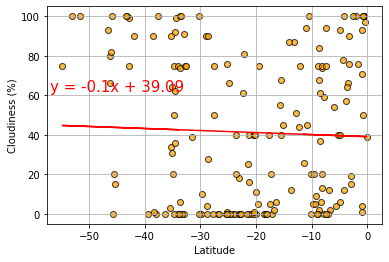

The r-squared is: -0.03737880993673715


In [142]:
x_value = Southern_df['Latitude']
y_value = Southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value, marker='o', facecolors='orange', alpha=.75, edgecolors='black')
plt.plot(x_value, regress_values, 'r-')
plt.annotate(line_eq,(-57,62),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('../output_data/SouthLatvsClouds.png')
plt.grid()
plt.show()
print(f'The r-squared is: {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

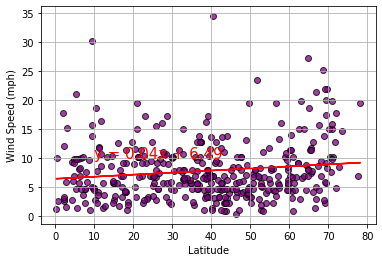

The r-squared is: 0.14168167780372248


In [143]:
x_value = Northern_df['Latitude']
y_value = Northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value, marker='o', facecolors='purple', alpha=.75, edgecolors='black')
plt.plot(x_value, regress_values, 'r-')
plt.annotate(line_eq,(10,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('../output_data/NorthLatvsWindSpd.png')
plt.grid()
plt.show()
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

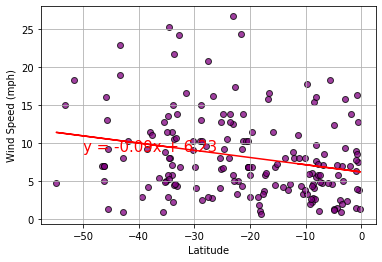

The r-squared is: -0.24143128713858608


In [144]:
x_value = Southern_df['Latitude']
y_value = Southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value, marker='o', facecolors='purple', alpha=.75, edgecolors='black')
plt.plot(x_value, regress_values, 'r-')
plt.annotate(line_eq,(-50,9),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('../output_data/SouthLatvsWindSpd.png')
plt.grid()
plt.show()
print(f'The r-squared is: {rvalue}')